# Predicting Heart disease using Machine Learning

This notebook looks into various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether they have heart disease?

## 2. Data

The original data came from cleveland data from the UCI Machine Learning Repository.

There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation.

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
from sklearn.metrics import  RocCurveDisplay

## Load the data

In [7]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data exploration (Exploratory data analysis or EDA)
The goal is to find out more about the data and become a subject matter export on the dataset you're working with.
1. What question(s) you are trying to solve?
2. What kind of data do we have and how do we treat different types of data?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
# finding out each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

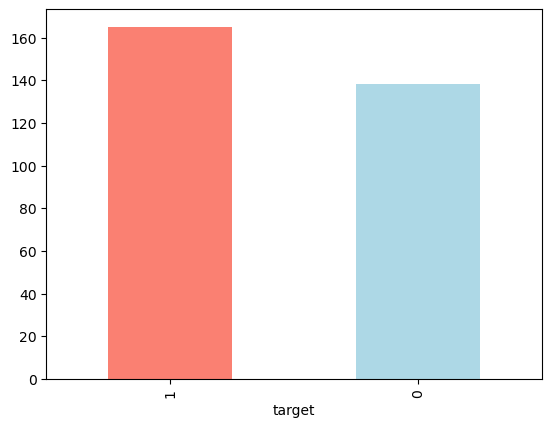

In [13]:
df["target"].value_counts().plot(kind="bar", color=["salmon", 'lightblue']);

## Heart disease frequency according to sex

In [14]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
#comparing target to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


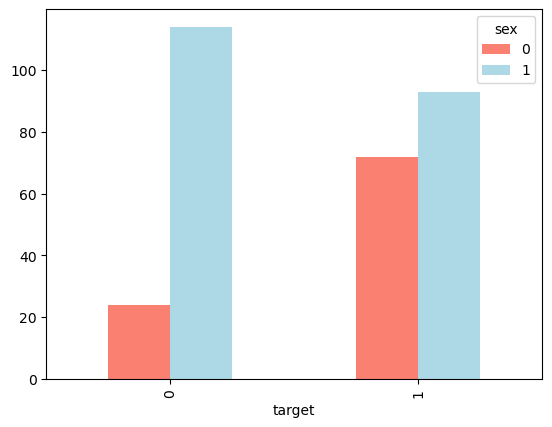

In [20]:
# plotting crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"]);

## Age vs Max heart rate for heart disease

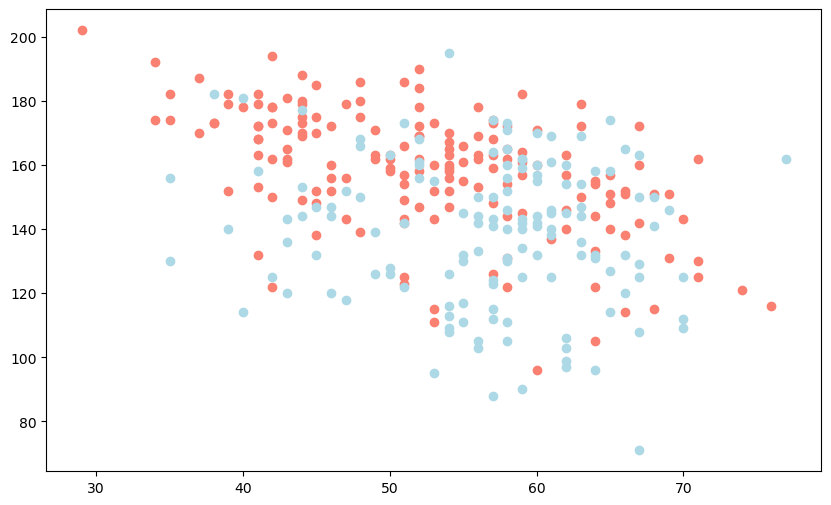

In [23]:
#Create another figure
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

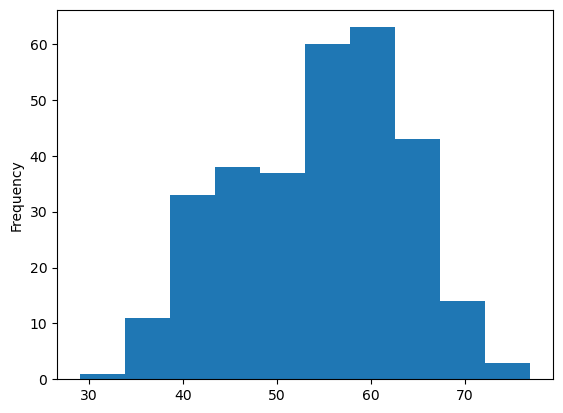

In [24]:
df.age.plot.hist();

## Heart disease frequency per chest type
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

In [27]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


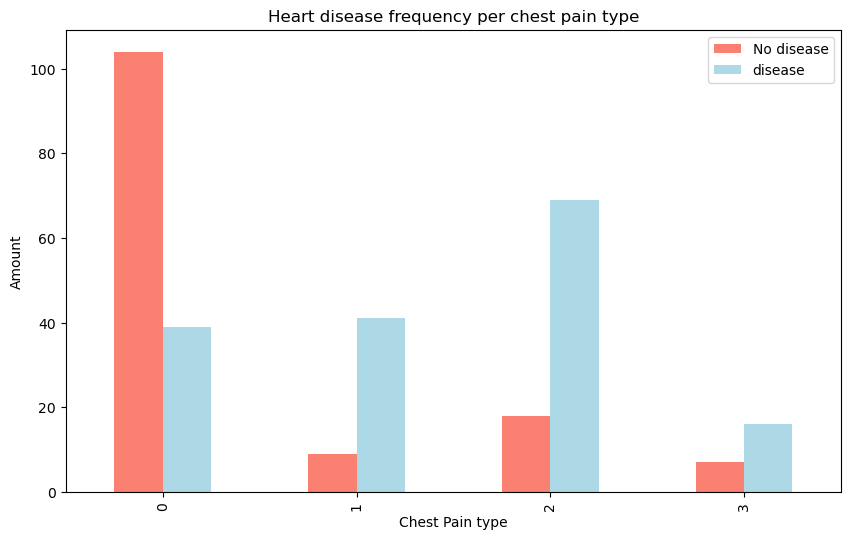

In [29]:
# make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", "lightblue"], figsize=(10,6));

# Add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "disease"])